1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

,features_1,features_2,features_3
features_1,1.000000,-0.005220,0.023690
features_2,-0.005220,1.000000,0.047360
features_3,0.023690,0.047360,1.000000


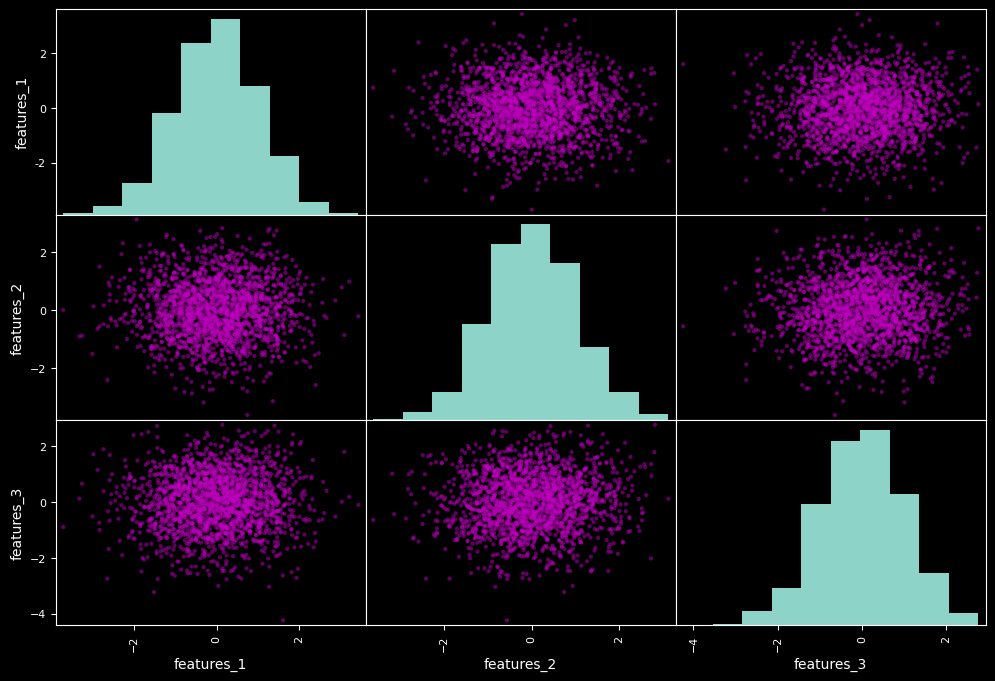

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#sns.set(style="darkgrid")
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

#leggo e converto il file .csv in un dataframe pandas
data  = pd.read_csv('data/regression_generated.csv')

#stampo la "scatter matrix" di features_1,2,3

tmp = pd.plotting.scatter_matrix(data[['features_1','features_2', 'features_3']], figsize=(12,8), c="m", grid='True')
#cerco la correlazione di features_1,2,3 e stampo la tabella
corr = data[['features_1','features_2', 'features_3']].corr()
corr.style.background_gradient(cmap='coolwarm')

#-->Non c'è correlazione, guardando la matrice risulta che la correlazione tra le diverse features è veramente bassa (es: tra 1 e 2 <0.005)


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

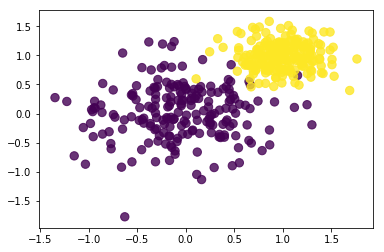

In [189]:
from IPython.display import Image
Image('Theory/images/two_categories_scatter_plot.png')

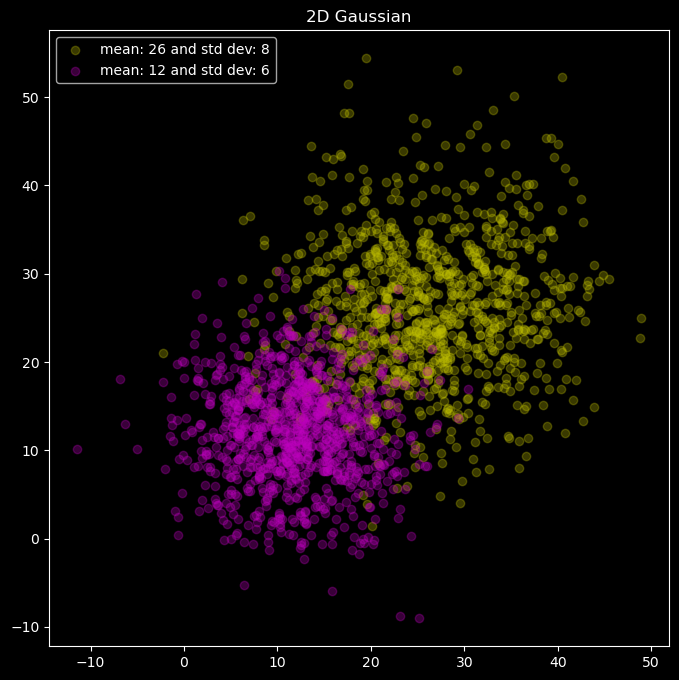

In [2]:
import numpy as np
import pandas as pd


plt.style.use('dark_background')
#primo dataset (1000 numeri)
mean1 = 26 #valore della media del primo dataset
std_dev1=8  #valore della deviazione standard del primo dataset
datset1 = np.array(mean1 + std_dev1 * np.random.randn(1000, 1000)) #primo dataset
#print(datset1.mean())  #verifica di media e dev. standard
#print(np.std(datset1))

#secondo dataset (1000 numeri)
mean2 = 12 #valore della media del secondo dataset
std_dev2=6  #valore della deviazione standard del secondo dataset
datset2 = np.array(mean2 + std_dev2 * np.random.randn(1000, 1000)) #secondo dataset
#print(datset2.mean())  #verifica di media e dev. standard
#print(np.std(datset2)) 

plt.figure(figsize = (8, 8))
plt.scatter(x=datset1[:,0], y=datset1[:,1], alpha=0.3, c='y', label=f"mean: {mean1} and std dev: {std_dev1}")
plt.scatter(x=datset2[:,0], y=datset2[:,1], alpha=0.3, c='m', label=f"mean: {mean2} and std dev: {std_dev2}")
plt.title("2D Gaussian")
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

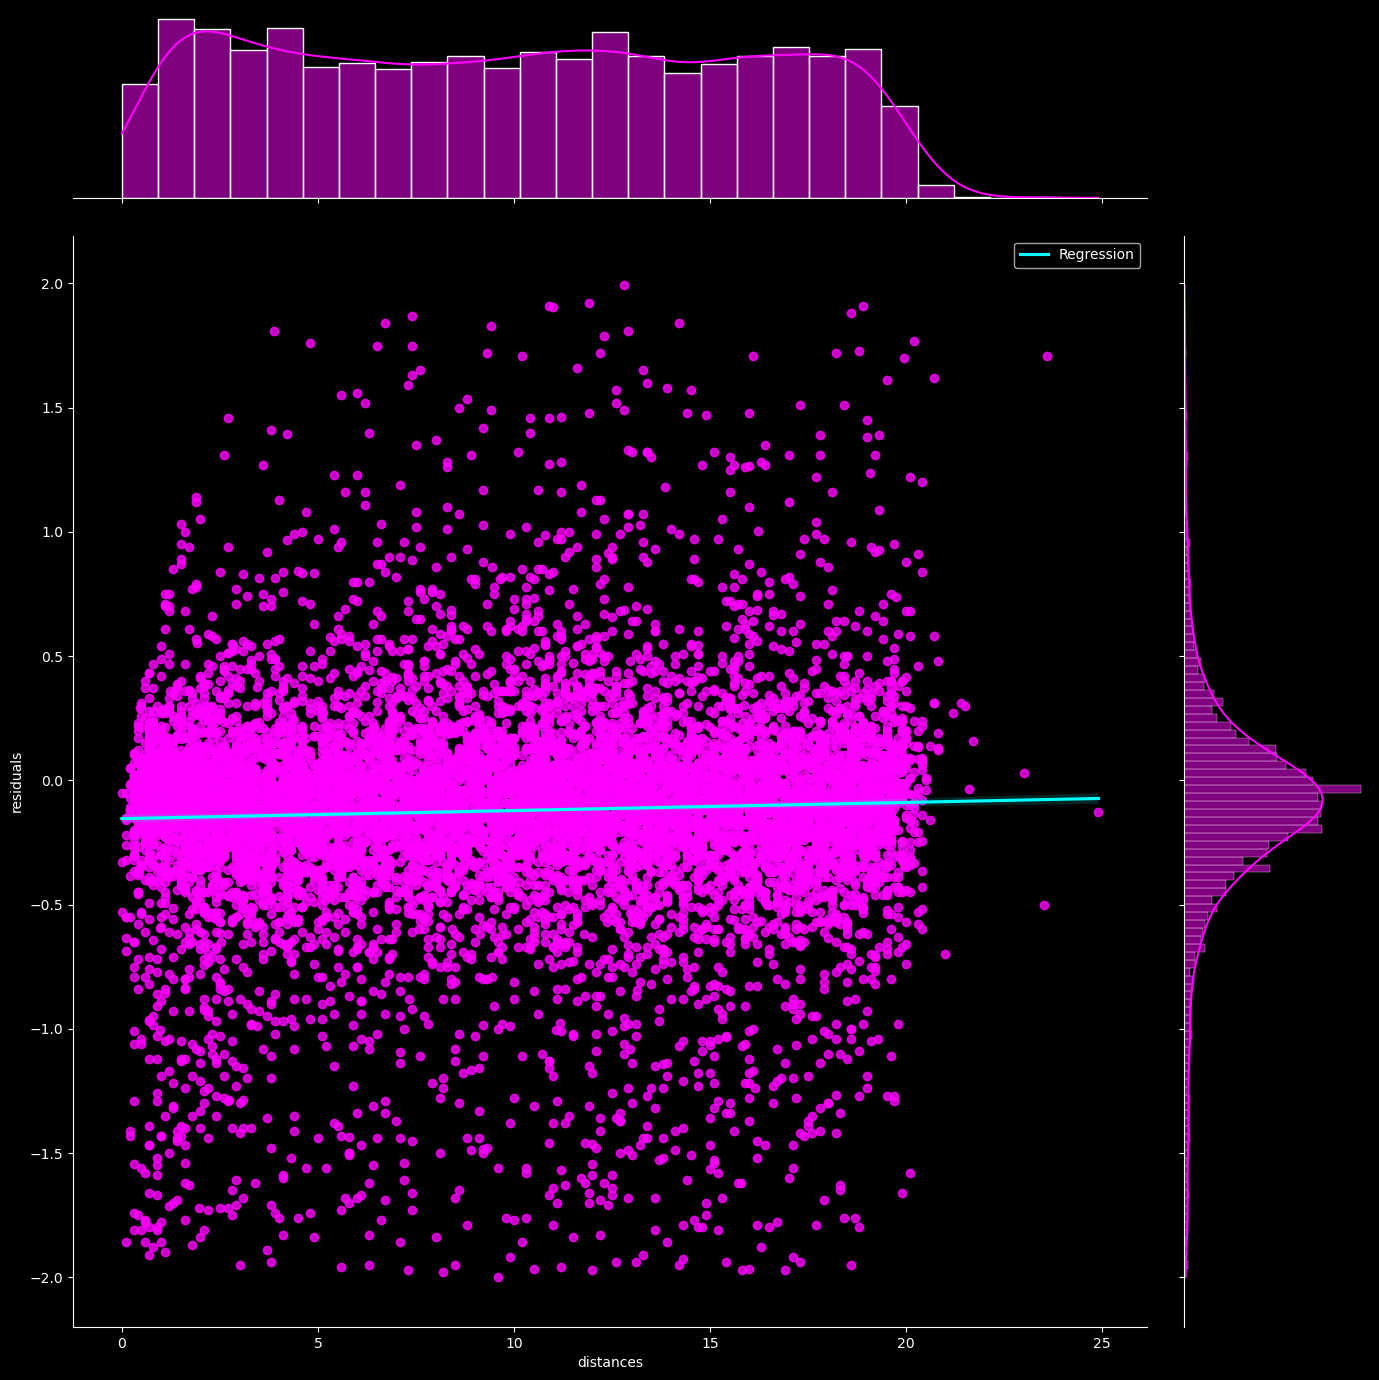

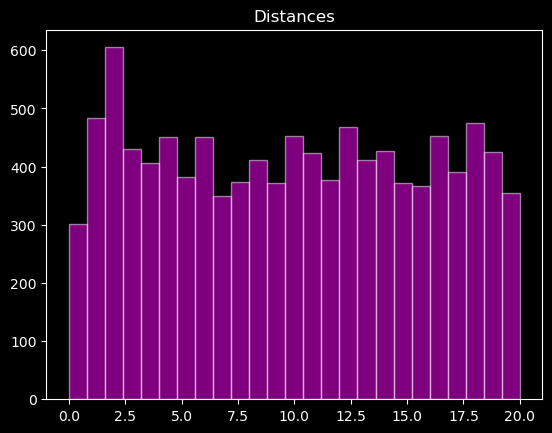

x:
[ 0.4  1.2  2.   2.8  3.6  4.4  5.2  6.   6.8  7.6  8.4  9.2 10.  10.8
 11.6 12.4 13.2 14.  14.8 15.6 16.4 17.2 18.  18.8 19.6]

y:
[-0.23334013605442772, -0.15755664004732142, -0.17261881149154032, -0.17265891472867756, -0.1411489841986534, -0.1253149206349072, -0.13273011717775512, -0.14486896842993777, -0.09200968754262727, -0.06308125923400477, -0.10698127600554033, -0.07129621095749959, -0.0826782297908158, -0.06445007317348095, -0.09530335934848333, -0.0836770451770448, -0.10805016799907265, -0.160195282807955, -0.16657834101381522, -0.10807084526461247, -0.12948735777497009, -0.18194154183413255, -0.12654025062656765, -0.11727137254902373, -0.03681678773205391]

err_y:
[0.4700588141456736, 0.4556535903066799, 0.4169192860411484, 0.42788007790199306, 0.4145615791705033, 0.369011886951562, 0.3717367903448502, 0.46749845511383126, 0.43991848237494285, 0.4384711211211888, 0.4388084887426329, 0.4179427411798105, 0.4309307340516104, 0.4569439831599643, 0.47166644112030204, 0.484513

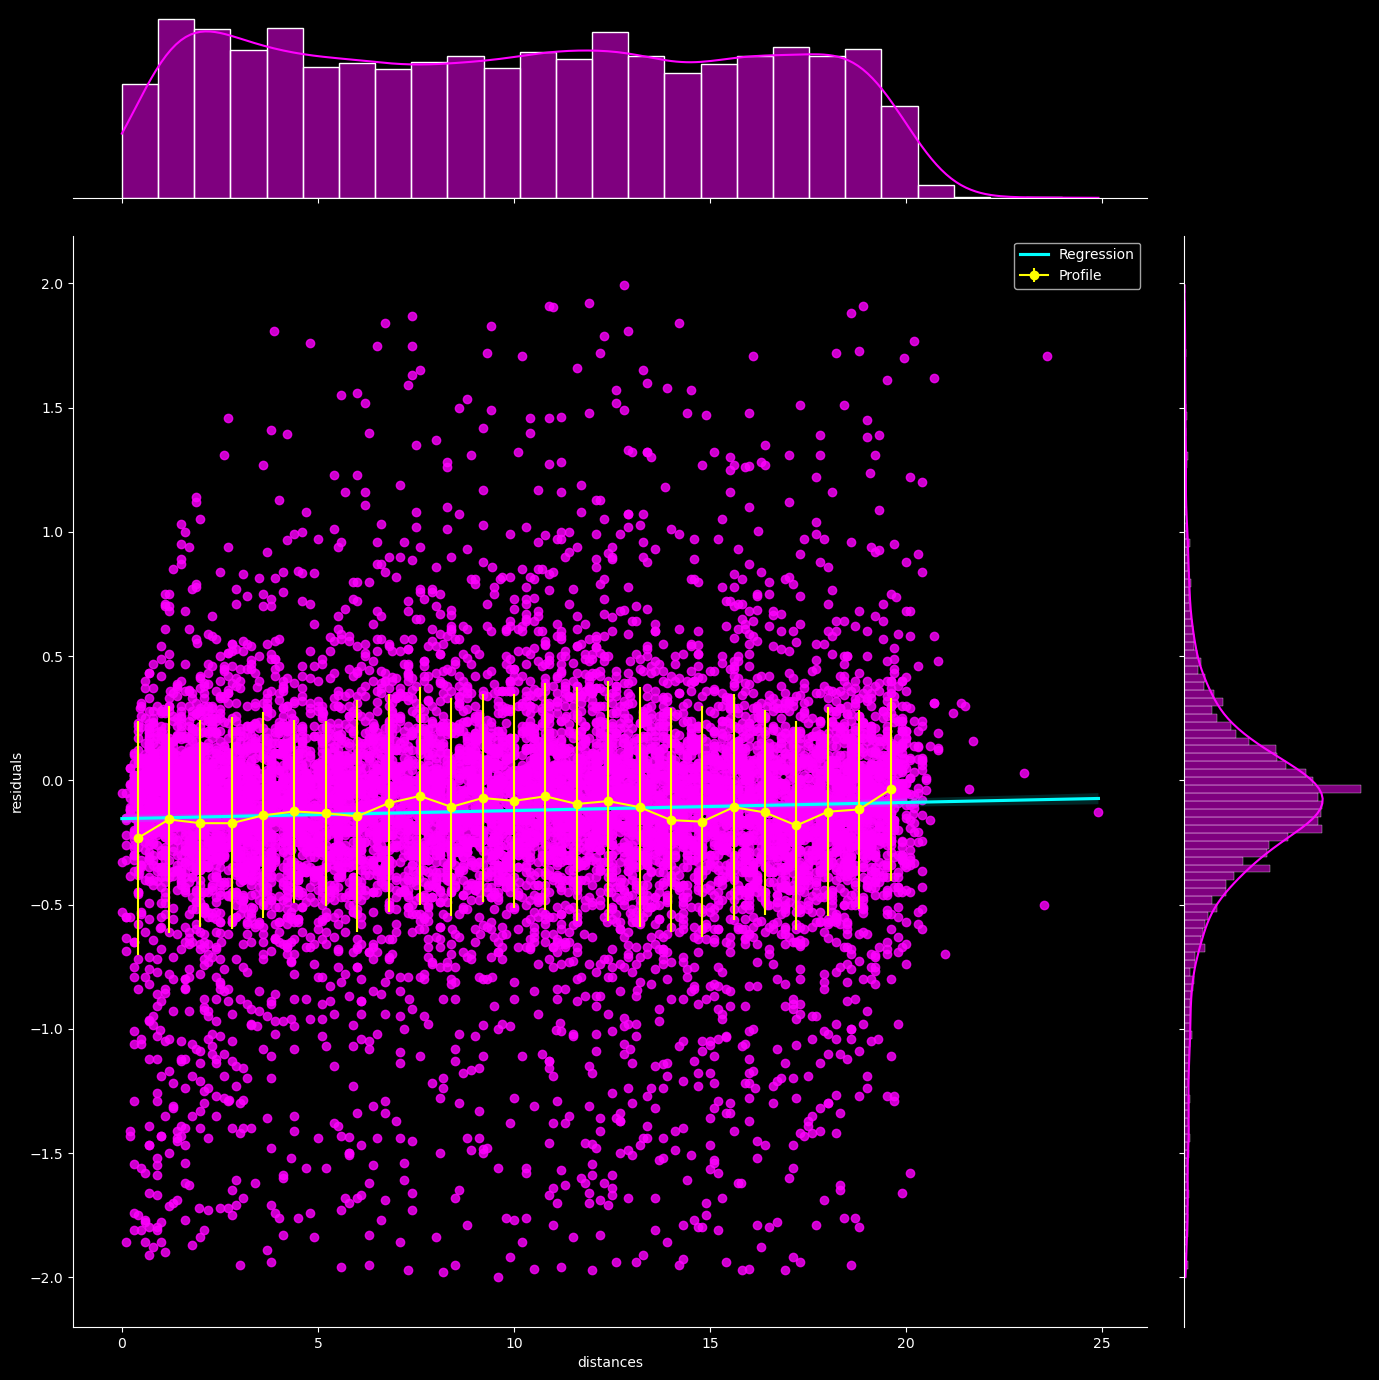

In [3]:
import seaborn as sns
import math
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

#leggo il file pkl
data_tmp = np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data_tmp) #converto in un dataframe di pandas

#pulisco il file
df = df[abs(df['residuals'])<2]

#stampo il grafico cercando anche la regressione
im = sns.jointplot(x='distances', y='residuals', data=df, kind="reg", color="magenta", joint_kws={'line_kws':{'color':'cyan', 'label':'Regression'}})
im.ax_joint.legend()
im.fig.set_size_inches(15,15)
plt.show()

#--> Si può dedurre dalla retta di regressione che c'è una correlazione minima tra le due variabili perchè quest'ultima è quasi totalmente orizzontale e il coefficiente angolare è circa zero.

#stampo l'istogramma relativo alle distanze (number of bins = bin )
bin = 25
(n, bins, patches) = plt.hist(df['distances'], bins=bin, facecolor='magenta', alpha=0.5, edgecolor='white', range=(0,20))
plt.title("Distances")
plt.show()

#trovo x 
x=(bins[1:]+bins[:-1])*0.5
print(f"x:\n{x}")

#trovo y
y = [df["residuals"][(df['distances'] >=bins[i]) & (df['distances'] <=bins[i+1])].mean() for i in range(bin)]
print(f"\ny:\n{y}")

#trovo err_y
err_y = [df["residuals"][(df['distances'] >bins[i]) & (df['distances'] <bins[i+1])].std() for i in range(bin)]
print(f"\nerr_y:\n{err_y}")

#stampo il "profile plot" sopra allo "scatter plot"
im2 = sns.jointplot(x='distances', y='residuals', data=df, kind="reg", color="magenta", joint_kws={'line_kws':{'color':'cyan', 'label':'Regression'}}) #scatter
im2.fig.set_size_inches(15,15)
plt.sca(im2.ax_joint)
plt.errorbar(x=x, y=y , yerr=err_y, marker = 'o', color = 'yellow', xlolims=22, label="Profile") #profile
plt.legend()
plt.show()



4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


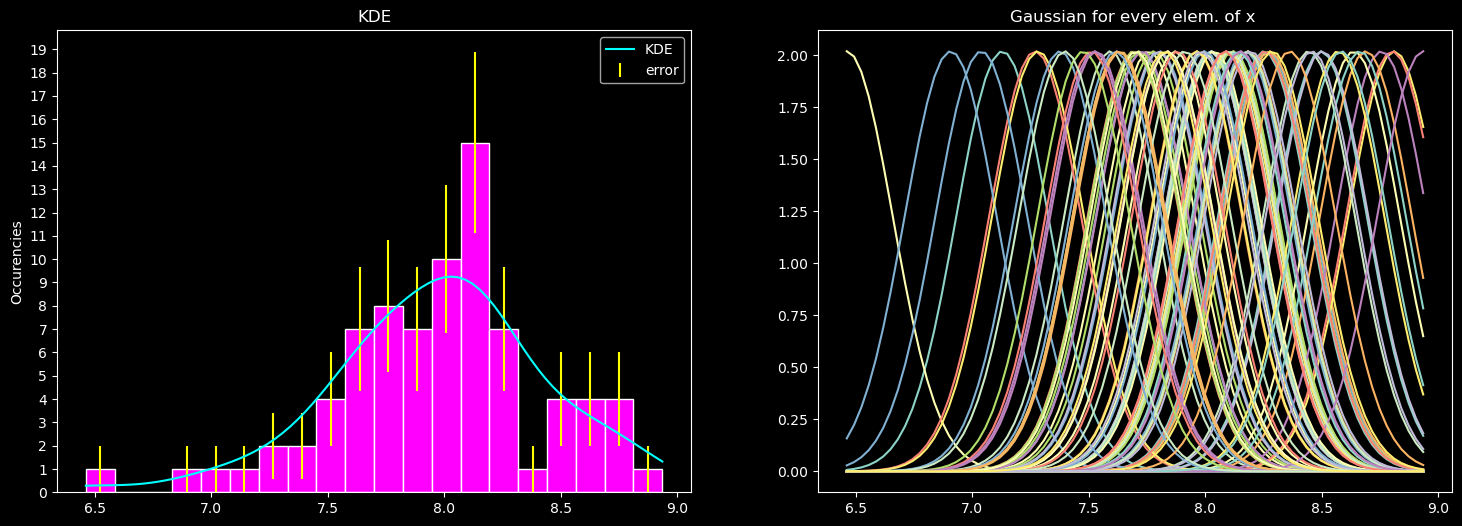

In [4]:
from scipy import stats
import scipy
from matplotlib.ticker import AutoMinorLocator

#creo un array di N elementi, distribuzione normale, media e deviazione standard dati 
mean = 8
std = 0.5
N=80
n_bins = int(N/4)
x = mean + std*np.random.randn(N)

#creo già un subplot con due grafici
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) 

#istogramma
bins = ax1.hist(x, bins=n_bins, color='magenta',edgecolor='white')
ax1.set_title('Histogram')
ax1.set_ylabel('Occurencies')
ax1.set_yticks(np.arange(0, N, 1)) 
error = np.sqrt(bins[0])
bins_center = (bins[1][:-1] + bins[1][1:])*0.5
ax1.errorbar(bins_center, bins[0], yerr=error, fmt='none', color='yellow', label="error")

#gaussiana per ogni elemento
std_def = 1.06*x.std() * x.size**(-1/5)
gaussians=[]
space = np.linspace(np.min(x), np.max(x), N)
for item in x:
    nrm = stats.norm(item, std_def)
    gaussians.append(nrm.pdf(space))
    ax2.plot(space, gaussians[-1])
ax2.set_title("Gaussian for every elem. of x ")

#KDE
area_sog = scipy.integrate.trapz(np.sum(gaussians, axis=0), space)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sog/area_hist
norm_sog = np.sum(gaussians, axis=0)/k_norm

ax1.set_title('KDE')
ax1.plot(space, norm_sog, color="cyan", label="KDE")
ax1.legend()
plt.show()
